In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset contains these rows:
Car_ID: A unique identifier for each car listing.

Brand: The brand or manufacturer of the car (e.g., Toyota, Honda, Ford, etc.).

Model: The model of the car (e.g., Camry, Civic, Mustang, etc.).

Year: The manufacturing year of the car.

Kilometers_Driven: The total kilometers driven by the car.

Fuel_Type: The type of fuel used by the car (e.g., Petrol, Diesel, Electric, etc.).

Transmission: The transmission type of the car (e.g., Manual, Automatic).

Owner_Type: The number of previous owners of the car (e.g., First, Second, Third).

Mileage: The fuel efficiency of the car in kilometers per liter.

Engine: The engine capacity of the car in CC (Cubic Centimeters).

Power: The maximum power output of the car in bhp (Brake Horsepower).

Seats: The number of seats available in the car.

Price: The selling price of the car in INR (Indian Rupees), which is the target variable to predict.

In [19]:
dataset = pd.read_csv('cars.csv')
dataset.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [20]:
dataset.tail()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000
99,100,Tata,Altroz,2020,18000,Petrol,Manual,First,20,1199,85,5,600000


In [21]:
dataset.drop(['Car_ID'], axis=1, inplace=True)
dataset

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [22]:
dataset.isna().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [23]:
y = dataset['Price']
x = dataset.drop(['Price'], axis=1)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Brand'] = le.fit_transform(x['Brand'])
x['Model'] = le.fit_transform(x['Model'])
x['Fuel_Type'] = le.fit_transform(x['Fuel_Type'])
x['Transmission'] = le.fit_transform(x['Transmission'])
x['Owner_Type'] = le.fit_transform(x['Owner_Type'])

x

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,9,15,2018,50000,1,1,0,15,1498,108,5
1,3,14,2019,40000,1,0,1,17,1597,140,5
2,2,30,2017,20000,1,0,0,10,4951,395,4
3,6,42,2020,30000,0,1,2,23,1248,74,5
4,4,41,2016,60000,0,0,1,18,1999,194,5
...,...,...,...,...,...,...,...,...,...,...,...
95,7,11,2019,22000,0,0,0,16,1950,191,5
96,9,29,2017,38000,0,1,1,13,2755,171,7
97,2,18,2018,26000,1,1,2,18,1497,121,5
98,4,50,2019,24000,1,0,1,17,1497,113,5


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(80, 11) (20, 11) (80,) (20,)


In [26]:
x_train

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
55,0,5,2018,28000,0,0,0,17,1968,187,5
88,2,30,2019,22000,1,0,0,13,2261,396,4
26,0,6,2018,28000,1,0,0,15,1984,241,5
42,8,46,2018,42000,0,1,0,24,1047,69,5
69,4,19,2017,32000,0,0,1,22,1582,126,5
...,...,...,...,...,...,...,...,...,...,...,...
60,4,50,2019,24000,1,0,1,17,1497,113,5
71,6,51,2019,24000,1,1,1,17,1462,103,5
14,6,21,2020,18000,1,1,0,19,1462,103,7
92,10,48,2017,32000,1,1,1,18,1598,103,5


In [27]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
mask = lof.fit_predict(x_train)
x_train[mask == 1].shape

(77, 11)

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
mask = lof.fit_predict(x_train_scaled)
x_train_scaled[mask == 1].shape

(79, 11)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
mask = lof.fit_predict(x_train_scaled)
x_train_scaled[mask == 1].shape

(80, 11)

In [30]:
x_train = x_train[mask == 1]
y_train = y_train[mask == 1]

<Axes: >

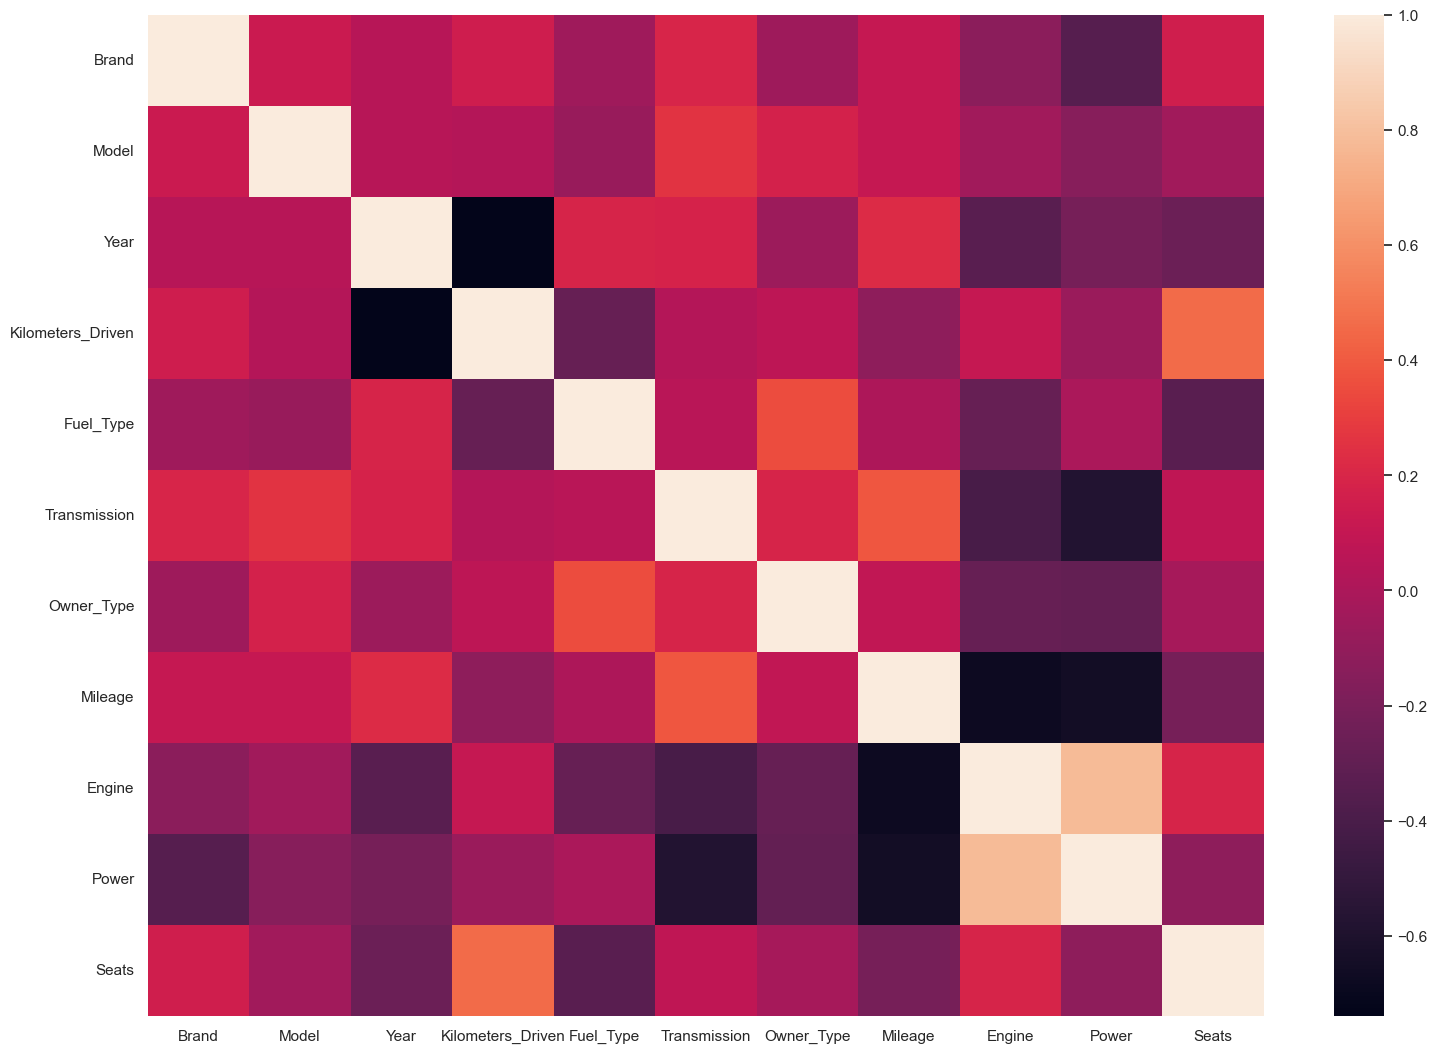

In [31]:


import seaborn as sns
sns.heatmap(x_train.corr())

In [32]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

############## After Correlation Analysis, You Don't Need to Remove Variables ##############


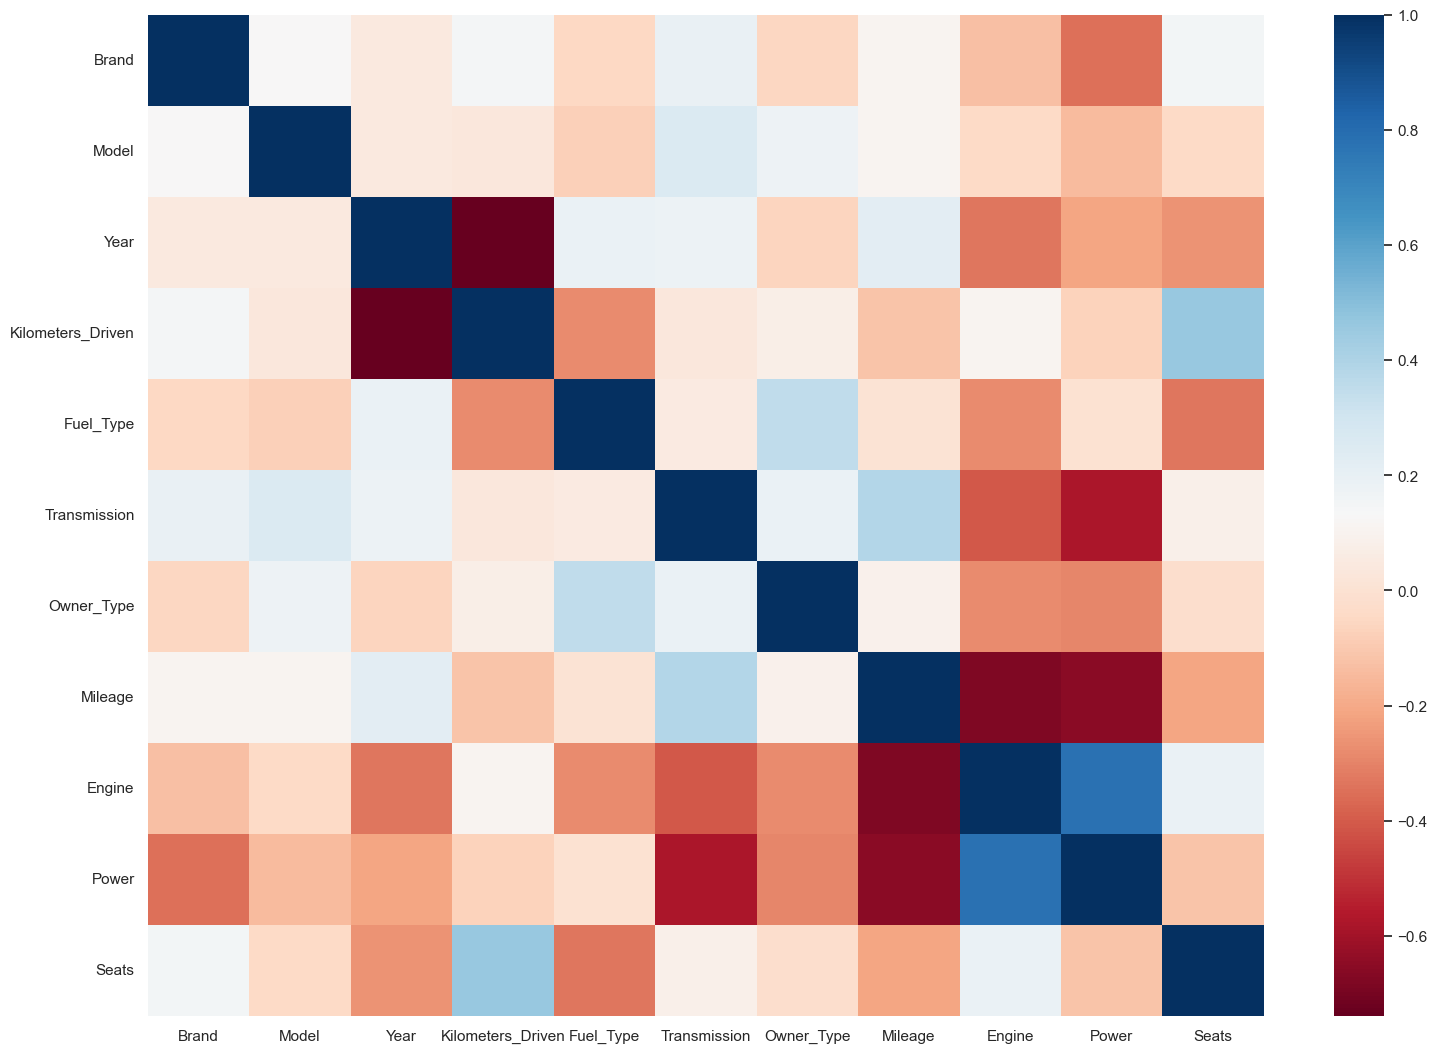

[]

In [33]:
high_correlated_cols(x_train, plot=True, corr_th = 0.90)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

scaler = MinMaxScaler()
model = DecisionTreeRegressor()

pipline = Pipeline([('scaler', scaler), ('model', model)])

param_grid = { 'model__max_depth': [2,4,6,8,10,12,14,16,18,20],
    'model__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],}

grid_search = GridSearchCV(pipline, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)
print(f"Best Params: {grid_search.best_params_}\n",
    grid_search.best_estimator_,
    f"\nbest Score: {grid_search.score(x_test, y_test)}")


Best Params: {'model__max_depth': 16, 'model__min_samples_leaf': 2}
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 DecisionTreeRegressor(max_depth=16, min_samples_leaf=2))]) 
best Score: 0.7748075917208399


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = DecisionTreeRegressor(max_depth=16, min_samples_leaf=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}\n"
      f"{model.score(x_test, y_test)}")

MSE: 203881944444.44
0.7507098557871927
